In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../../Data/rejected.csv')
rejected.shape

(27648741, 9)

In [4]:
rejected.head(2)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0


In [6]:
accepted = pd.read_csv('../../Data/accepted.csv')
accepted.shape

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)

In [7]:
rejected.shape[0] + accepted.shape[0]

29909442

In [8]:
a = accepted[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length', 'addr_state', 'zip_code', 'policy_code']]

a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)
a = a.assign(DI = (a['loan_amnt'] / a['annual_inc']))

a.shape

(2260701, 12)

In [9]:
a = a.rename(columns={'FICO':'Risk Score', 'purpose':'Loan Title', 'loan_amnt':'Amount Requested',
                      'policy_code':'Policy Code', 'addr_state':'State', 'zip_code':'Zip Code',
                      'issue_d':'Application Date', 'emp_length':'Employment Length', 
                      'DI':'Debt-To-Income Ratio'})

In [10]:
a = a[['Amount Requested', 'Application Date', 'Loan Title', 'Risk Score', 'Debt-To-Income Ratio', 'Zip Code',
   'State', 'Employment Length', 'Policy Code']]

In [11]:
a.shape

(2260701, 9)

In [12]:
a.dropna().shape

(2113756, 9)

In [13]:
rejected.shape

(27648741, 9)

In [14]:
rejected.dropna().shape

(8992195, 9)

In [15]:
a.dropna().shape[0] + rejected.dropna().shape[0]

11105951

In [16]:
data = {'Total Applications':[11.105951, 29.909442],
        'Accepted':[2.113756, 2.260701],
       'Rejected':[8.992195, 27.648741]}

eda = pd.DataFrame(data, index=['Drop NAs', 'Original Data'])

eda

,Total Applications,Accepted,Rejected
Drop NAs,11.105951,2.113756,8.992195
Original Data,29.909442,2.260701,27.648741


<Figure size 576x288 with 0 Axes>

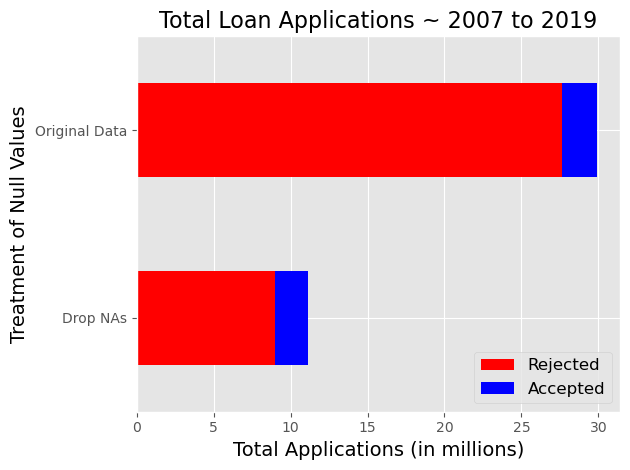

In [17]:
#from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

#y=np.arange(len())

eda[['Rejected', 'Accepted']].plot.barh(stacked=True, 
                                       color={'Rejected':'Red',
                                              'Accepted':'Blue'}
                                       )


plt.title('Total Loan Applications ~ 2007 to 2019', fontsize=16, color='black')
plt.xlabel('Total Applications (in millions)', fontsize=14, color='black')
plt.ylabel('Treatment of Null Values', fontsize=14, color='black')
#plt.yticks([])
plt.legend(fontsize=12)
#plt.ticklabel_format(style='plain')

#plt.ylabel('Application Status', fontsize=14, color='blue')

#plt.text(10, 0.98, '9.4%', fontsize=10)

#plt.annotate('90%', xy=(10, 0.25), xytext=(10, 0.25),
            # arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

#plt.annotate('0.7%', xy=(80000, 0.15), xytext=(90000, 0.25),
#             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

#plt.margins(x=0.15)
#plt.yticks(fontsize=12)

plt.tight_layout()
plt.show();